In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
meteo_path = 'Sunlab-Faro-Meteo-2017.xlsx'
pv_path = 'Sunlab-Faro-PV-2017.xlsx'

meteo_df = pd.read_excel(meteo_path, sheet_name='sunlab-faro-meteo-2017')
pv_df = pd.read_excel(pv_path, sheet_name='sunlab-faro-pv-2017')


In [4]:
# Display basic information
print("Meteo Dataset Info:")
print(meteo_df.info())
print(meteo_df.head())

print("\nPV Dataset Info:")
print(pv_df.info())
print(pv_df.head())


Meteo Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524890 entries, 0 to 524889
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Datetime                    524890 non-null  object 
 1   Ambient Temperature [ÂºC]   524890 non-null  float64
 2   Global Radiation [W/m2]     524890 non-null  float64
 3   Diffuse Radiation [W/m2]    524890 non-null  float64
 4   Ultraviolet [W/m2]          524890 non-null  float64
 5   Wind Velocity [m/s]         524890 non-null  float64
 6   Wind Direction [Âº]         524890 non-null  float64
 7   Precipitation [mm]          524890 non-null  float64
 8   Atmospheric pressure [hPa]  524890 non-null  float64
dtypes: float64(8), object(1)
memory usage: 36.0+ MB
None
                    Datetime  Ambient Temperature [ÂºC]  \
0  2017-11-30T15:42:00+00:00                       15.8   
1  2017-11-30T15:44:00+00:00                       15.8 

In [5]:
# Clean column names
meteo_df.columns = meteo_df.columns.str.replace('[^a-zA-Z0-9 _]', '', regex=True)
pv_df.columns = pv_df.columns.str.replace('[^a-zA-Z0-9 _]', '', regex=True)

# Convert datetime columns to datetime type
meteo_df['Datetime'] = pd.to_datetime(meteo_df['Datetime'], errors='coerce')
pv_df['Datetime'] = pd.to_datetime(pv_df['Datetime'], errors='coerce')

# Handle missing or invalid datetime rows
meteo_df = meteo_df.dropna(subset=['Datetime'])
pv_df = pv_df.dropna(subset=['Datetime'])

# Check for missing values in datasets
print("Missing Values in Meteo Dataset:")
print(meteo_df.isnull().sum())

print("\nMissing Values in PV Dataset:")
print(pv_df.isnull().sum())


<ipython-input-5-39c3712f04e1>:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  meteo_df['Datetime'] = pd.to_datetime(meteo_df['Datetime'], errors='coerce')


Missing Values in Meteo Dataset:
Datetime                    0
Ambient Temperature C       0
Global Radiation Wm2        0
Diffuse Radiation Wm2       0
Ultraviolet Wm2             0
Wind Velocity ms            0
Wind Direction              0
Precipitation mm            0
Atmospheric pressure hPa    0
dtype: int64

Missing Values in PV Dataset:
Datetime                          0
A_Vertical  Voltage DC V       6266
A_Vertical  Current DC A       6266
A_Vertical  Power DC W         6266
A_Optimal  Voltage DC V        4097
A_Optimal  Current DC A        4097
A_Optimal  Power DC W          4097
A_Horizontal  Voltage DC V     4358
A_Horizontal  Current DC A     4358
A_Horizontal  Power DC W       4358
A_Vertical  Temperature C         0
A_Optimal  Temperature C          0
A_Horizontal  Temperature C       0
B_Vertical  Voltage DC V       5197
B_Vertical  Current DC A       5197
B_Vertical  Power DC W         5197
B_Optimal  Voltage DC V        4313
B_Optimal  Current DC A        4313
B_Opt

Meteo Dataset Summary:
       Ambient Temperature C  Global Radiation Wm2  Diffuse Radiation Wm2  \
count           5.248900e+05         524890.000000          524890.000000   
mean           -5.696618e+03            229.720337              63.373129   
std             2.928004e+06            315.990218              92.295267   
min            -1.500000e+09              0.731202               1.590219   
25%             1.460000e+01              1.561721               1.701220   
50%             1.870000e+01              8.294550               7.991072   
75%             2.330000e+01            442.262700              96.588342   
max             3.790000e+01           1484.379800             715.146720   

       Ultraviolet Wm2  Wind Velocity ms  Wind Direction   Precipitation mm  \
count    524890.000000      5.248900e+05    524890.000000     524890.000000   
mean         13.937115     -5.713284e+03       206.477602          0.000697   
std          18.942142      2.928004e+06      

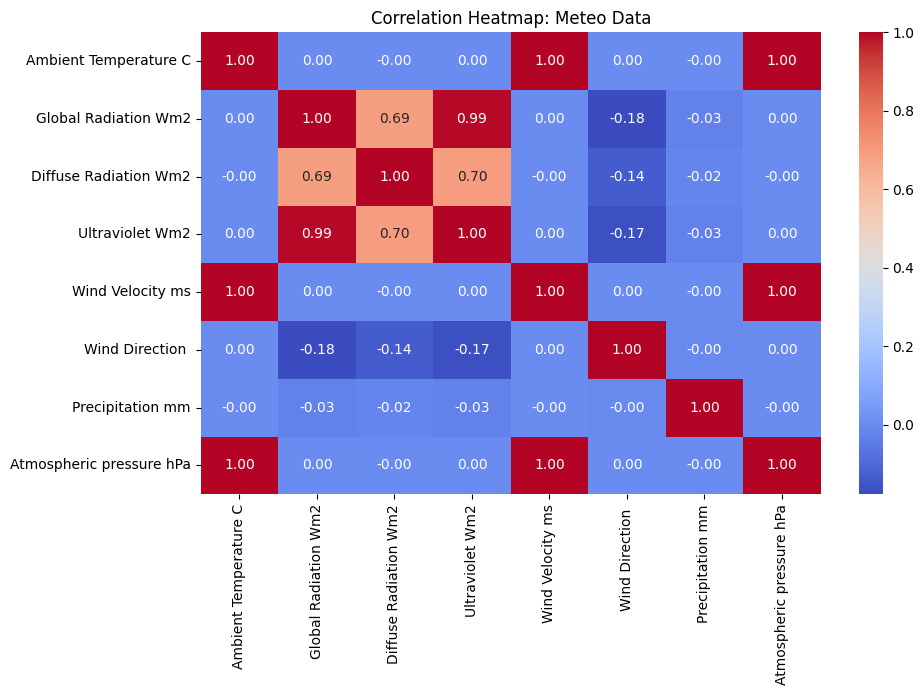

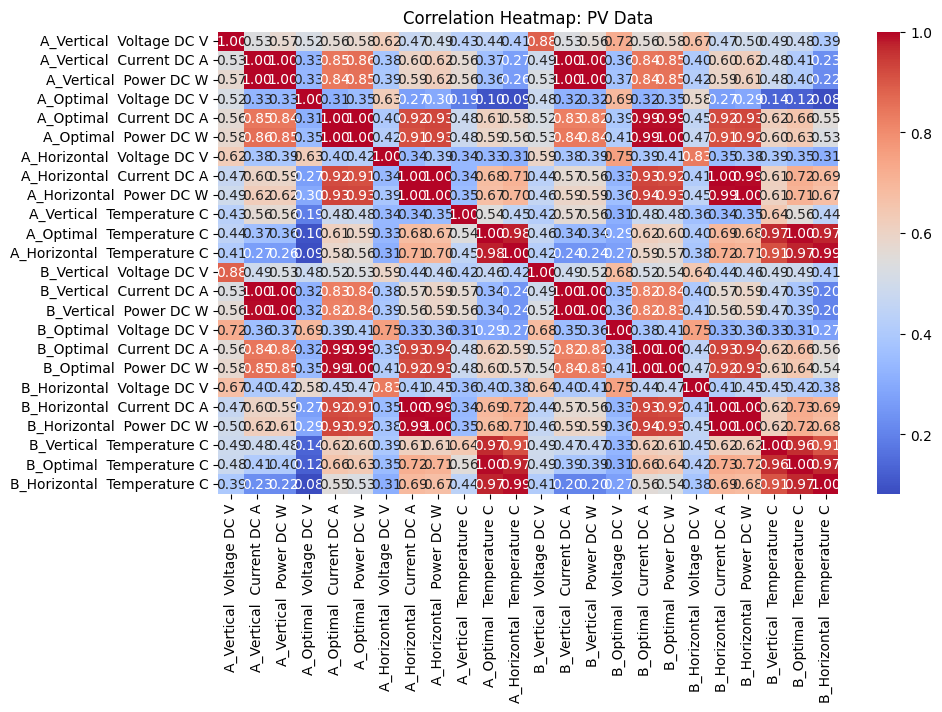

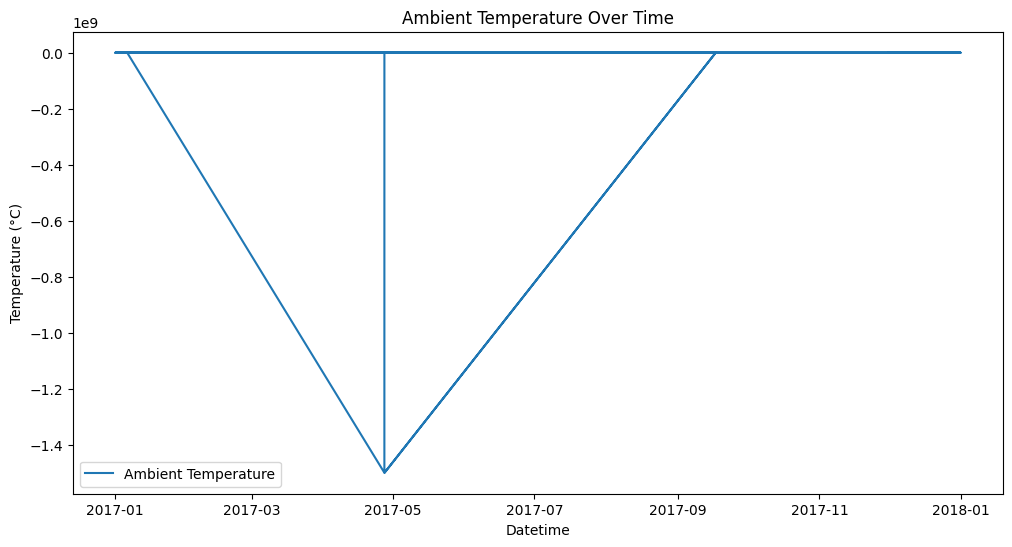

In [7]:
# Summary statistics
print("Meteo Dataset Summary:")
print(meteo_df.describe())

print("\nPV Dataset Summary:")
print(pv_df.describe())

# Correlation heatmap for Meteo data
numeric_meteo_df = meteo_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_meteo_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap: Meteo Data')
plt.show()

# Correlation heatmap for PV data
numeric_pv_df = pv_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_pv_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap: PV Data')
plt.show()

# Time-series visualization (example: Ambient Temperature)
plt.figure(figsize=(12, 6))
plt.plot(meteo_df['Datetime'], meteo_df['Ambient Temperature C'], label='Ambient Temperature')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature Over Time')
plt.legend()
plt.show()